<h2 id="what-is-data">What is data?</h2>

<p>What is data? <strong>Frequentist statistics</strong> is one answer to this philosophical question. It treats data as a <strong>sample</strong> from an existing <strong>population</strong>.</p>

<p>This notion is probably clearest to you from elections, where some companies like Zogby or CNN take polls. The sample in these polls maybe a 1000 people, but they “represent” the electoral population at large. We attempt to draw inferences about how the population will vote based on these samples.</p>

<p>We model the sample we have. This model typically involves having some kind of distribution, some kind of algorithm, some kind of story that characterizes the data. These descriptions have, usually, some parameters which need estimation.</p>

<p><strong>Frequentist analysis</strong> considers these parameters as fixed and data as varying (stochastic), with our data as one possible sample from the population.</p>

<h3 id="the-data-story">The Data story</h3>

<p>Data analysis involves coming up with a story of how the data came to be. This may be a causal story, or a descriptive one (correlational, associative). The critical point is this:</p>

<p><strong>The story must be sufficient to specify an algorithm to simulate new data</strong>. This is the model we have been talking about: a <strong>formal probability model</strong>. And once we have pinned it down from our existing sample, using a method such as Maximum Likelihood Estimation talked about below, we can use it as a generating mechanism.</p>

<p>Consider, for example, tossing a globe in the air and catching it. When you catch it mark whats under your right index finger: W for water, L for land.</p>

<p>Lets say you toss the globe 10 times and get something like <code class="highlighter-rouge">WLWWWLWlWW</code>. We wish to analyze this experiment to figure how much of the earth is covered in water (according to the globe, at any rate!).</p>

<p>Let us say that our model is:</p>

<ol>
  <li>The true proportion of water is $p$.</li>
  <li>We use this as a Bernoulli probability for each globe toss, where $p$ is thus the probability that you get a <code class="highlighter-rouge">W</code>. This assumption is one of being <strong>Identically Distributed</strong>.</li>
  <li>Each globe toss is <strong>Independent</strong> of the other.</li>
</ol>

<p>Assumptions 2 and 3 taken together are called <strong>IID</strong>, or <strong>Independent and Identially Distributed</strong> Data.</p>

<h2 id="a-probabilistic-model">A probabilistic model</h2>

<p>(from the data story)</p>

<p>The components of the model depend upon what kind of statistical analysis we are doing. For Frequentist analysis, the components are:</p>

<ol>
  <li>The <strong>likelihood</strong>, or the <em>plausibility of the data under the model</em></li>
  <li>and the parameters which go into this plausibility.</li>
</ol>

<p>For our example, we begin by enumerating the <em>events</em>. These are <code class="highlighter-rouge">W</code> and <code class="highlighter-rouge">L</code>. There’s nothing else.</p>

<p>Then we consider N such tosses and ask the question, how often would we see <code class="highlighter-rouge">W</code>s.</p>

<p>This given by the <strong>Binomial Distribution</strong>, the distribution of the number of successes in a sequence of $n$ independent yes/no experiments, or Bernoulli trials, each of which yields success with probability $p$. The Binomial distribution is an extension of the Bernoulli when $n&gt;1$ or the Bernoulli is the a special case of the Binomial when $n=1$.</p>

$$P(X = k \mid n, p) = {n\choose k}p^k(1-p)^{n-k}$$

<p>where</p>

$${n\choose k}=\frac{n!}{k!(n-k)!}$$

<p>How did we obtain this? The $p^k(1-p)^{n-k}$ comes simply from multiplying the probabilities for each bernoulli trial; there are $k$ 1’s or yes’s, and $n-k$ 0’s or no’s. The ${n\choose k}$ comes from counting the number of ways in which each event happens: this corresponds to counting all the paths that give the same number of heads in the diagram above.</p>

<p>We show the distribution below for 200 trials.</p>

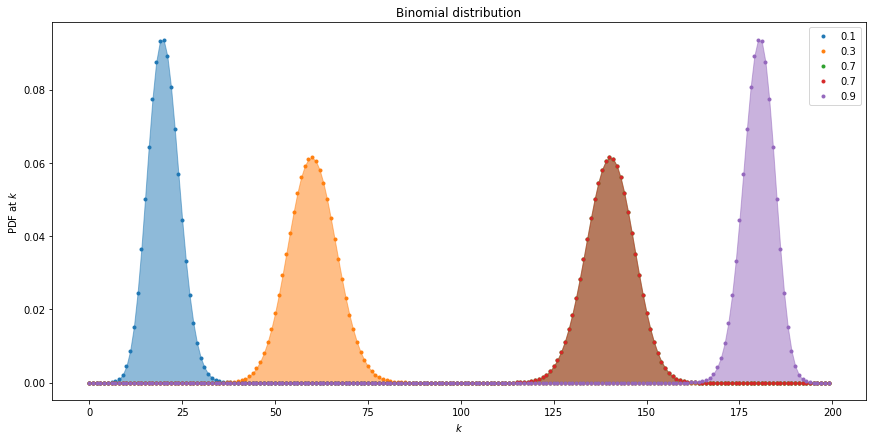

In [7]:
%matplotlib inline
# See all the "as ..." contructs? They're just aliasing the package names.
# That way we can call methods like plt.plot() instead of matplotlib.pyplot.plot().
import numpy as np
import scipy as sp
import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from scipy.stats import binom
import seaborn as sns

colors=sns.color_palette()

plt.figure(figsize=(12,6))
k = np.arange(0, 200)

for p, color in zip([0.1, 0.3, 0.7, 0.7, 0.9], colors):
    rv = binom(200, p)
    plt.plot(k, rv.pmf(k), '.', lw=2, color=color, label=p)
    plt.fill_between(k, rv.pmf(k), color=color, alpha=0.5)
q=plt.legend()
plt.title("Binomial distribution")
plt.tight_layout()
q=plt.ylabel("PDF at $k$")
q=plt.xlabel("$k$")

<p>Now we use a method to fit our model and find the parameter $p$, or rather, the estimate $\hat{p}$ that we can obtain from our sample. Once we have that, we can use the Binomial distribution to generate new samples.</p>

<p>Note that there is a problem with this, in that we dont know the true value $p^*$ of the globe-toss model (speaking in the frequentist paradigm). Thus we are generating new samples from our estimate, rather than our true value.</p>

<h2 id="maximum-likelihood-estimation">Maximum Likelihood Estimation</h2>

<p>One of the techniques used to estimate parameters in frequentist statistics, from the data in a given sample, is <strong>maximum likelihood estimation</strong>. Briefly, the idea behind it is:</p>

<p>The likelihood for IID data $x_1,…,x_n$, is the product</p>

$$L(\lambda) = \prod_{i=1}^n P(x_i | \lambda)$$

<p>gives us a measure of how likely it is to observe values $x_1,…,x_n$ given the parameters $\lambda$. Maximum likelihood fitting consists of choosing the appropriate “likelihood” function $L=P(X \mid \lambda)$ to maximize for a given set of observations. How likely are the observations if the model is true?</p>

<p>An image can explain this better. We want to choose the distribution that maximizes the product of the vertical lines. Here the blue does better, but it is not clear if the blue is the best.</p>

<p><img src="../images/gaussmle.png" alt="" /></p>

<p>Often it is easier and numerically more stable to maximize the log likelihood:</p>

$$\ell(\lambda) = \sum_{i=1}^n ln(P(x_i \mid \lambda))$$

<p>Notice that the definition here is a bit different from that for the question of the globe tosses above: there the data was $k$, the number of <code class="highlighter-rouge">W</code> tosses and not the exact order, and so we formulate the question in that form.</p>

<p>So dont follow the formula blindly, but think of (a) what is the data, and (b) what is the data generating mechanism!</p>

<h3 id="mle-for-binomial">MLE for binomial.</h3>

<p>There:</p>

$$P(X = k \mid n, p) = {n\choose k}p^k(1-p)^{n-k}$$

<p>So:</p>

$$\ell = log({n\choose k}) + k log(p) + (n-k) log(1-p)$$

<p>Differentiating with respect to $p$ and setting to 0 yields:</p>

$$\frac{d\ell}{dp} = \frac{k}{p}  - \frac{n -k}{1-p} = 0$$

<p>which gives us:</p>

$$p_{MLE} = \frac{k}{n}$$

<p>which you might have intuitively expected.</p>

<h2 id="point-estimates">Point estimates</h2>

<p>In frequentist statistics, the data we have in hand, is viewed as a <strong>sample</strong> from a population. So if we want to calculate some quantity of the population, like say the mean, we estimate it on the sample.</p>

<p>This is because we’ve been given only one sample. Ideally we’d want to see the population, but we have no such luck.</p>

<p>The parameter estimate is computed by applying an estimator $F$ to the sample data $D$, so $\est{\mu} = F(D)$.</p>

<p><strong>The parameter is viewed as fixed and the data as random, which is the exact opposite of the Bayesian approach which you will learn later in this class.</strong></p>

<p>If you assume that your model describes the true generating process for the data, then there is some true $\trueval{\mu}$ . We dont know this. The best we can do to start with is to estimate the $\est{\mu}$ from the data set we have.</p>

<h3 id="from-single-to-multiple-estimates">From single to multiple estimates</h3>

<p>Now, imagine that I let you peek at the entire population in this way: I gave you some M data sets <strong>drawn</strong> from the population, and you can now find $\mu$ on each such dataset, of which the one we have here is one.
So, we’d have M estimates of the $\mu$.</p>

<p>Thus if we had many replications of this data set: that is, an <strong>ensemble</strong> of data sets, for example, we can compute other $\est{\mu}$, and begin to construct what is called the <strong>sampling distribution</strong> of $\mu$.</p>

<p>But we dont.</p>

<h2 id="sampling-distribution-of-the-parameter">Sampling Distribution of the parameter</h2>

<p>What you are doing is sampling M Data Sets $D_i$ from the true population. We will now calculate M $\est{\mu}_i$, one for each dataset. As we let $M \rightarrow \infty$, the distribution induced on $\est{\mu}$ is the <strong>sampling distribution of the estimator</strong>.</p>

<p>Our estimation could be of anything, even for example the $\lambda$ we were tying to find with MLE (F would be the MLE estimation process).</p>

<p>We can use the sampling distribution to put confidence intervals on the estimation of the parameters, for example.</p>

<h2 id="bootstrap">Bootstrap</h2>

<p>Bootstrap tries to approximate our sampling distribution. If we knew the true parameters of the population, we could generate M fake datasets. Then we could compute the parameter (or another estimator) on each one of these, to get a empirical sampling distribution of the parameter or estimator.</p>

<h3 id="parametric-bootstrap">Parametric Bootstrap</h3>

<p>But we dont have the true parameter. So we generate these samples, using the parameter we calculated. This is the <strong>parametric bootstrap</strong>. The process is illustrated in the diagram below, taken from Shalizi:</p>

<p><img src="../images/parabootstrap.png" alt="" /></p>

<p>There are 3 sources of error with respect to the sampling distribution that come from the bootstrap:</p>

<ul>
  <li>simulation error: the number of samples M is finite. This can be made arbitrarily small by making M large</li>
  <li>statistical error: resampling from an estimated parameter is not the “true” data generating process. Often though, the distribution of an estimator from the samples around the truth is more invariant, so subtraction is a good choice in reducing the sampling error</li>
  <li>specification error: the model isnt quite good.</li>
</ul>

<h3 id="non-parametric-bootstrap">Non-parametric bootstrap</h3>

<p>To address specification error, alternatively, we sample with replacement the X from our original sample D, generating many fake datasets, and then compute the distribution on the parameters as before. This is the <strong>non parametric bootstrap</strong>. We want to sample with replacement, for if we do so, more typical values will be represented more often in the multiple datasets we create.</p>

<p>Here we are using the <strong>empirical distribution</strong>, since it comes without any model preconceptions. This process may be illustrated so:</p>

<p><img src="../images/nonparabootstrap.png" alt="" /></p>